In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, normaltest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

ModuleNotFoundError: No module named 'statsmodels'

In [5]:
#Per Google Colab
!git clone https://github.com/francescodesantis/corso_progetto.git

Cloning into 'corso_progetto'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 92 (delta 23), reused 31 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 374.01 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [7]:
os.chdir('corso_progetto/statistica_esercitazione2')
print(os.getcwd())

/content/corso_progetto/statistica_esercitazione2


In [9]:
data = scipy.io.loadmat('Data_example4.mat')

In [10]:
WeightLoss = data['WeightLoss'].flatten()
Diet = data['Diet'].flatten()
gender = data['gender'].flatten()

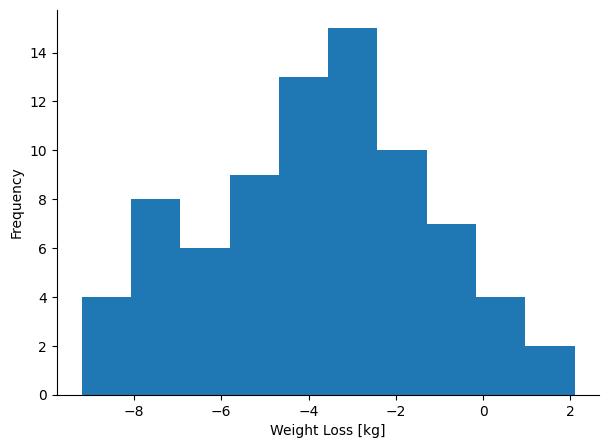

In [13]:
# Preliminary data visualization
fig, ax = plt.subplots(1, figsize = (7,5))

ax.hist(WeightLoss)
ax.set_xlabel('Weight Loss [kg]')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [14]:
_,p = normaltest(WeightLoss)
p

np.float64(0.6617935470237468)

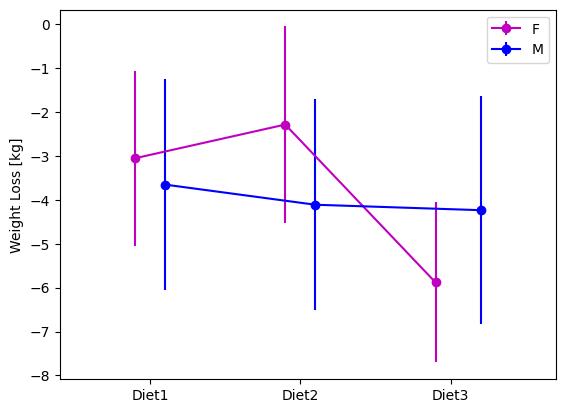

In [ ]:
# Mean and standard deviation calculation for each diet and gender combination
mean_diet1F = np.mean(WeightLoss[(Diet == 1) & (gender == 0)])
mean_diet1M = np.mean(WeightLoss[(Diet == 1) & (gender == 1)])
mean_diet2F = np.mean(WeightLoss[(Diet == 2) & (gender == 0)])
mean_diet2M = np.mean(WeightLoss[(Diet == 2) & (gender == 1)])
mean_diet3F = np.mean(WeightLoss[(Diet == 3) & (gender == 0)])
mean_diet3M = np.mean(WeightLoss[(Diet == 3) & (gender == 1)])

std_diet1F = np.std(WeightLoss[(Diet == 1) & (gender == 0)])
std_diet1M = np.std(WeightLoss[(Diet == 1) & (gender == 1)])
std_diet2F = np.std(WeightLoss[(Diet == 2) & (gender == 0)])
std_diet2M = np.std(WeightLoss[(Diet == 2) & (gender == 1)])
std_diet3F = np.std(WeightLoss[(Diet == 3) & (gender == 0)])
std_diet3M = np.std(WeightLoss[(Diet == 3) & (gender == 1)])

# Visualization of means with error bars
plt.figure()
plt.errorbar([1, 2, 3], [mean_diet1F, mean_diet2F, mean_diet3F], [std_diet1F, std_diet2F, std_diet3F], marker='o', color='m', linestyle='-')
plt.errorbar([1.2, 2.2, 3.3], [mean_diet1M, mean_diet2M, mean_diet3M], [std_diet1M, std_diet2M, std_diet3M], marker='o', color='b', linestyle='-')
plt.xticks([1.1, 2.1, 3.1], ['Diet1', 'Diet2', 'Diet3'])
plt.ylabel('Weight Loss [kg]')
plt.xlim([0.5, 3.8])
plt.legend(['F', 'M'])
plt.show()

Nel caso dell'ANOVA, l'ipotesi nulla prevede che i dati di tutti i gruppi abbiano la stessa origine, ovvero la stessa distribuzione stocastica, e che le differenze osservate tra i gruppi siano dovute solo al caso.

In [ ]:
# Creating DataFrame from the data
df = pd.DataFrame({'outcome_variable': WeightLoss,
                   'factor1': Diet,
                   'factor2': gender})

# Defining the model
model = ols('outcome_variable ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(factor1),70.470330,2.0,6.534709,0.002467
C(factor2),1.035165,1.0,0.191982,0.662584
C(factor1):C(factor2),40.919962,2.0,3.794506,0.027118
Residual,388.224133,72.0,NaN,NaN
